In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [6]:
#criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [7]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [8]:
#Criando uma nova coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [9]:
df["Mes_venda"] = df["Data"].dt.month

In [10]:
df["Dia_venda"] = df["Data"].dt.day

In [14]:
#quantas vendas por loja decrescente
df["LojaID"].value_counts(ascending =False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

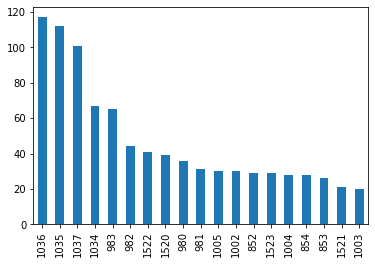

In [22]:
#gerar grafico em barras .plot.bar
df["LojaID"].value_counts(ascending=False).plot.bar();

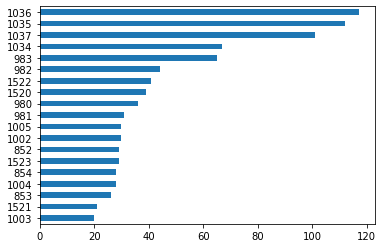

In [21]:
#gerar grafico em barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

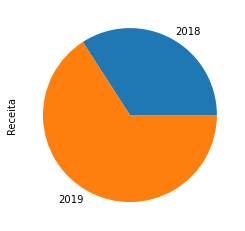

In [24]:
#grafico de pizza .plot.pie
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [25]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [26]:
import matplotlib.pyplot as plt

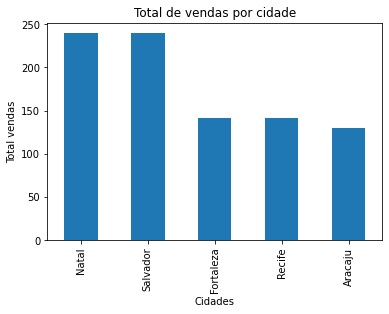

In [30]:
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade")
plt.xlabel("Cidades")
plt.ylabel("Total vendas");

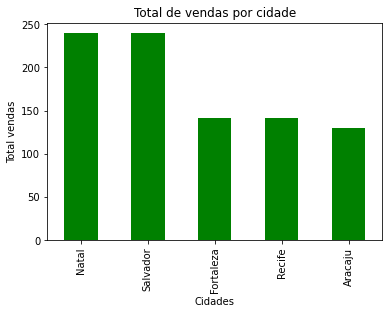

In [31]:
#alterand a cor do grafico
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade", color="green")
plt.xlabel("Cidades")
plt.ylabel("Total vendas");

In [32]:
#alterando estilo
plt.style.use("ggplot")

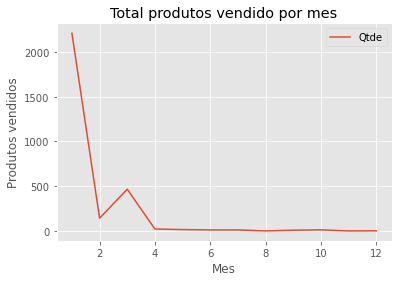

In [38]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendido por mes")
plt.xlabel("Mes")
plt.ylabel("Produtos vendidos");
plt.legend();

In [39]:
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [40]:
df_2019 = df[df["Ano_venda"] == 2019]

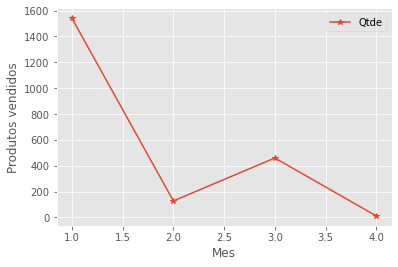

In [42]:
#total de produtos vendidos por mes em 2019
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.xlabel("Mes")
plt.ylabel("Produtos vendidos")
plt.legend();

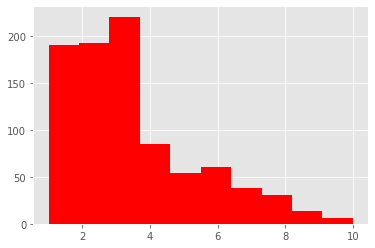

In [43]:
#histograma
plt.hist(df["Qtde"], color ="red");

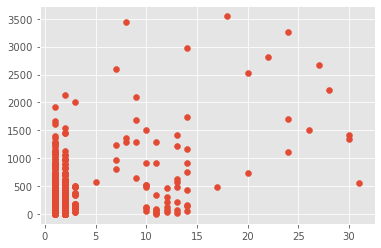

In [45]:
plt.scatter(x=df_2019["Dia_venda"], y = df_2019["Receita"]);

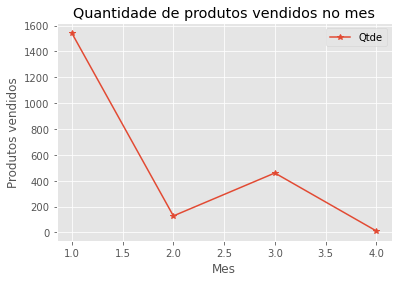

In [48]:
#salvar em png
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.title("Quantidade de produtos vendidos no mes")
plt.xlabel("Mes")
plt.ylabel("Produtos vendidos")
plt.legend()
plt.savefig("grafico Qtde x Mes.png");